### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 25th at 11.59pm CST
---

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import poisson

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx$$

1) What does this integral analytically evaluate to? (Should involve $\sigma$.) Once you work this equation out, we will refer to this equality of the integral and analytic value as EQ1. 

2) Write down the standard form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

3) Manipulate EQ1 such that you can write the integral in terms of a function of $x$ weighted by a normalized half-Gaussian distribution. 

4) Draw $N=10^5$ samples from a $\sigma=2$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your new equation involving a half-Gaussian distribution from (3). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

5) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

6) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

1.
$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx$$
According to this handy identity (that I found here- http://tyr0.chem.wsu.edu/~kipeters/Chem332/resources/TableofUsefulIntegrals.pdf):
$$ \int_0^\infty x^3 \exp\left(-ax^2\right) \,dx = \frac{1}{2a^2}$$
for us, $$ a = \frac{1}{2\sigma^2}$$
$$ \Longrightarrow EQ1: \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4$$

2.
Gaussian for $ x \in (-\inf, \inf)$: $$ g(x|\mu=0,\sigma=\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) $$
Half-Gaussian for $x \in [0, \inf)$: $$ g_{half}(x|\mu=0,\sigma=\sigma) = \frac{2}{\sigma\sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) $$

3.
$$ g_{half}(x|\mu=0,\sigma=\sigma) \frac{\sigma\sqrt{2\pi}}{2} = \exp\left(-\frac{x^2}{2\sigma^2}\right) $$
$$ \Longrightarrow EQ1 = \frac{\sigma\sqrt{2\pi}}{2} \int_0^\infty x^3 g_{half}(x|\mu=0,\sigma=\sigma) \,dx $$

4.
$$ \frac{\sigma\sqrt{2\pi}}{2} \langle x^3 \rangle = 2\sigma^4$$

In [2]:
def monte_carlo(sigma, N, batch=1):
    '''
    Function to calculate the monte carlo approximation.
    -------------------------
    Args:
    sigma - the standard deviation of the gaussian
    N - number of samples to generate
    batch - number of batches to repeat generation
    -------------------------
    Returns:
    values - list of size(batch) holding the calculated value for each run
    '''
    values = []
    for i in range(batch):
        samples = norm(0, sigma).rvs(N)
        values.append((sigma*np.sqrt(2*np.pi)/2) * np.mean(samples[samples >= 0]**3))
    return values

In [3]:
# task 4
sigma = 2
N_1e5 = monte_carlo(sigma, 100000)
print("Monte Carlo Value:", N_1e5[0])
print("Mathematical Value:", 2*sigma**4)

Monte Carlo Value: 32.07907894882047
Mathematical Value: 32


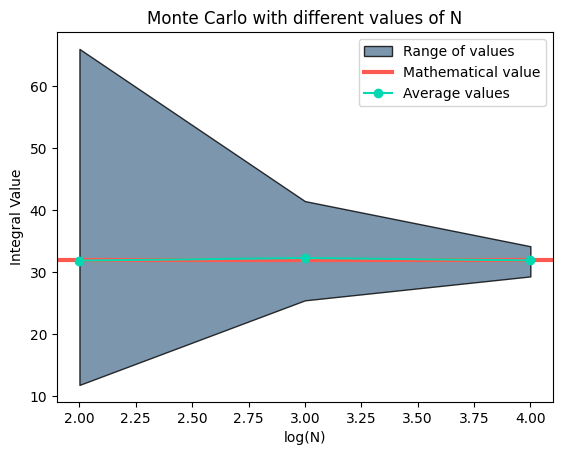

In [4]:
# task 5
N_1e2 = monte_carlo(sigma, 100, 100)
N_1e3 = monte_carlo(sigma, 1000, 100)
N_1e4 = monte_carlo(sigma, 10000, 100)

# task 6
logN = [2, 3, 4]
upper_lim = [max(N_1e2), max(N_1e3), max(N_1e4)]
lower_lim = [min(N_1e2), min(N_1e3), min(N_1e4)]
avg = [np.average(N_1e2), np.average(N_1e3), np.average(N_1e4)]

plt.fill_between(logN, upper_lim, lower_lim, alpha=0.8, edgecolor="k", facecolor="xkcd:slate blue", label="Range of values")
plt.axhline(y=32, color='xkcd:coral', linestyle='-', label="Mathematical value", linewidth=3)
plt.plot(logN, avg, "-o", color="xkcd:aquamarine", label="Average values")

plt.title("Monte Carlo with different values of N")
plt.xlabel("log(N)")
plt.ylabel("Integral Value")
plt.legend()
plt.show()

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=150$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^5$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 150? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

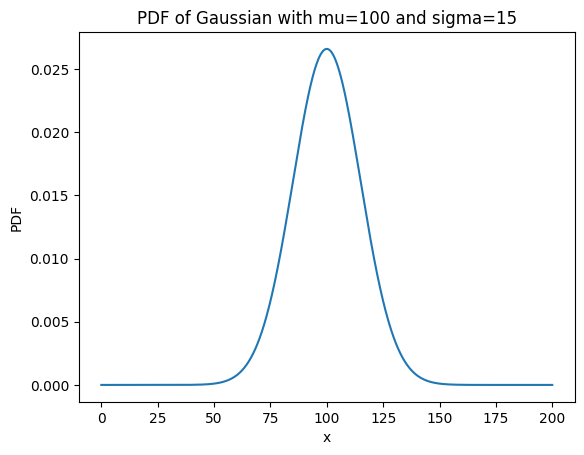

10 random draws: [103.57691572  86.7880329   97.99939066 100.05869523  89.31646298
 111.86417337  98.32779798  93.2979596  128.39267506 107.78060563]
PDF evaluated at x=150: 0.00010281859975274035


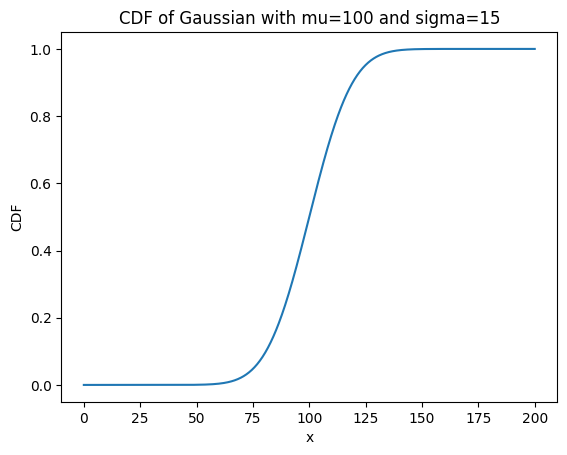

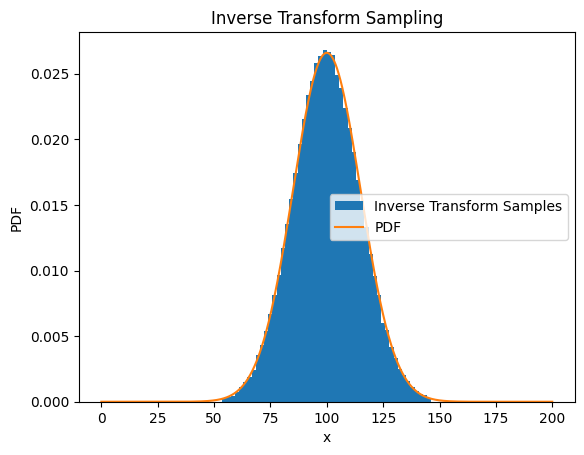

Fraction of people that have IQ > 150: 0.04291%
1-in-a-million IQ can either be 171.30 or 28.70


In [5]:
# task 1
distG = norm(100, 15)
x = np.linspace(0, 200, 1000)
plt.plot(x, distG.pdf(x))

plt.xlabel("x")
plt.ylabel("PDF")
plt.title("PDF of Gaussian with mu=100 and sigma=15")
plt.show()

draws = distG.rvs(size = 10)
print("10 random draws:", draws)

p = distG.pdf(x = 150)
print("PDF evaluated at x=150:", p)

# task 2
plt.plot(x, distG.cdf(x))

plt.xlabel("x")
plt.ylabel("CDF")
plt.title("CDF of Gaussian with mu=100 and sigma=15")
plt.show()

u = np.random.uniform(0.001, 0.999, 100000)
plt.hist(distG.ppf(u), bins=50, density=True, label="Inverse Transform Samples")
plt.plot(x, distG.pdf(x), label="PDF")

plt.xlabel("x")
plt.ylabel("PDF")
plt.title("Inverse Transform Sampling")
plt.legend()
plt.show()

# task 3 + 4
print(f"Fraction of people that have IQ > 150: {100*(1 - distG.cdf(150)):.5f}%")
print(f"1-in-a-million IQ can either be {distG.ppf(1-0.000001):.2f} or {distG.ppf(0.000001):.2f}")

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

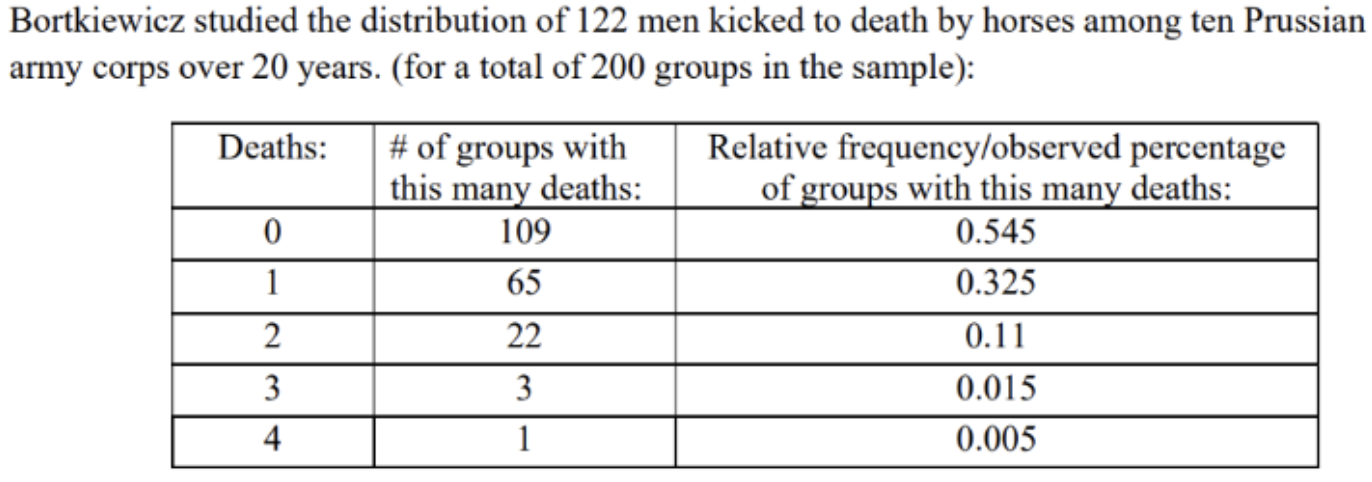

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting soon, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

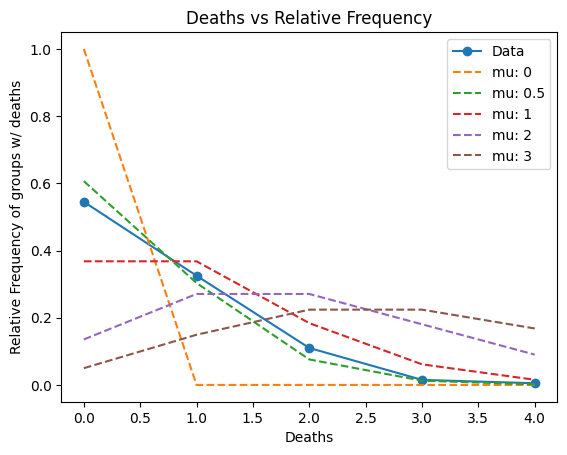

Deduced mu of the modeled Poisson distribution: 0.610


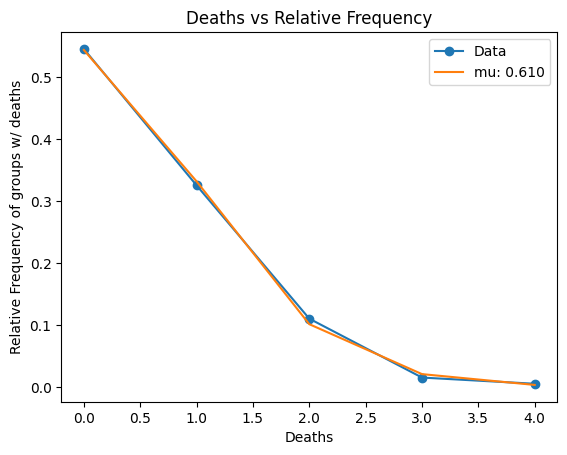

In [ ]:
# task 1
deaths = [0, 1, 2, 3, 4]
freq = [0.545, 0.325, 0.11, 0.015, 0.005]
plt.plot(deaths, freq, '-o', label="Data")

# task 2
for mu in [0, 0.5, 1, 2, 3]:
    plt.plot(deaths, poisson.pmf(deaths, mu), '--', label="mu: "+str(mu)) # mu = 0.5 is the closest from these values

plt.xlabel("Deaths")
plt.ylabel("Relative Frequency of groups w/ deaths")
plt.title("Deaths vs Relative Frequency")
plt.legend()
plt.show()

# task 3
mu = sum([deaths[i]*freq[i] for i in range(len(deaths))])
print(f"Deduced mu of the modeled Poisson distribution: {mu:.03f}")

# task 4
plt.plot(deaths, freq, '-o', label="Data")
plt.plot(deaths, poisson.pmf(deaths, mu), '-', label="mu: "+str(mu)[:5])

plt.xlabel("Deaths")
plt.ylabel("Relative Frequency of groups w/ deaths")
plt.title("Deaths vs Relative Frequency")
plt.legend()
plt.show()